Importing in necessary libraries in the notebook:

In [240]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [241]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Uploading the data:

In [242]:
inpatient_claims=pd.read_csv('/content/drive/MyDrive/NHIF DATASET.csv')
inpatient_claims

,r/ship,hcp name,hcp cat,hcp level,admission date,discharge date,days,received date,origin FY,disease,status,scheme,Claim Amt,Bill Amt,voucher date,branch,county
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,08/08/2020,08/08/2020,0.0,02/09/1998,2020/21,C20,U,RETIREES,16000.0,8000.0,NaN,K N H BRANCH,NAIROBI
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,12/06/2021,13/06/2021,1.0,23/04/1999,2020/21,J18.9,RH,NHS,1800.0,77330.0,NaN,KAKAMEGA BRANCH,KAKAMEGA
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,21/10/2020,25/10/2020,4.0,04/09/1998,2020/21,K63.9,AA,NHS,50000.0,50000.0,NaN,THIKA BRANCH,KIAMBU
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,04/10/2018,07/10/2018,3.0,02/09/1998,2018/19,A49,RA,Blank,3600.0,3600.0,NaN,KISUMU BRANCH,KISUMU
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,25/08/2018,25/08/2018,0.0,05/12/2002,2018/19,O80.0,RA,NHS,17000.0,3439.0,NaN,MIGORI BRANCH,MIGORI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,MURANG'A,NaN
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,MURANG'A,NaN
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,14/04/2023,14/04/2023,0.0,29/07/2023,2022/23,O80.0,AA,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,MURANG'A,NaN
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,MURANG'A,NaN


#adding the days till notice column
received date - admission date

In [243]:
inpatient_claims['days till notice'] = pd.to_datetime(inpatient_claims['received date']) - pd.to_datetime(inpatient_claims['admission date'])

In [244]:
inpatient_claims.shape

(904884, 18)

In [245]:
inpatient_claims.head()

,r/ship,hcp name,hcp cat,hcp level,admission date,discharge date,days,received date,origin FY,disease,status,scheme,Claim Amt,Bill Amt,voucher date,branch,county,days till notice
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,08/08/2020,08/08/2020,0.0,02/09/1998,2020/21,C20,U,RETIREES,16000.0,8000.0,NaN,K N H BRANCH,NAIROBI,-8216 days
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,12/06/2021,13/06/2021,1.0,23/04/1999,2020/21,J18.9,RH,NHS,1800.0,77330.0,NaN,KAKAMEGA BRANCH,KAKAMEGA,-8263 days
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,21/10/2020,25/10/2020,4.0,04/09/1998,2020/21,K63.9,AA,NHS,50000.0,50000.0,NaN,THIKA BRANCH,KIAMBU,-8231 days
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,04/10/2018,07/10/2018,3.0,02/09/1998,2018/19,A49,RA,Blank,3600.0,3600.0,NaN,KISUMU BRANCH,KISUMU,-7365 days
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,25/08/2018,25/08/2018,0.0,05/12/2002,2018/19,O80.0,RA,NHS,17000.0,3439.0,NaN,MIGORI BRANCH,MIGORI,-5949 days


In [246]:
inpatient_claims.columns

Index(['r/ship', 'hcp name', 'hcp cat', 'hcp level', 'admission date',
       'discharge date', 'days', 'received date', 'origin FY', 'disease',
       'status', 'scheme', 'Claim Amt', 'Bill Amt', 'voucher date', 'branch',
       'county', 'days till notice'],
      dtype='object')

In [247]:
inpatient_claims.dtypes

r/ship                       object
hcp name                     object
hcp cat                      object
hcp level                    object
admission date               object
discharge date               object
days                        float64
received date                object
origin FY                    object
disease                      object
status                       object
scheme                       object
Claim Amt                   float64
Bill Amt                    float64
voucher date                 object
branch                       object
county                       object
days till notice    timedelta64[ns]
dtype: object

Converting the days till notice to integers

To check percentage of null values (missing values) in each column

In [248]:
inpatient_claims.head()

,r/ship,hcp name,hcp cat,hcp level,admission date,discharge date,days,received date,origin FY,disease,status,scheme,Claim Amt,Bill Amt,voucher date,branch,county,days till notice
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,08/08/2020,08/08/2020,0.0,02/09/1998,2020/21,C20,U,RETIREES,16000.0,8000.0,NaN,K N H BRANCH,NAIROBI,-8216 days
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,12/06/2021,13/06/2021,1.0,23/04/1999,2020/21,J18.9,RH,NHS,1800.0,77330.0,NaN,KAKAMEGA BRANCH,KAKAMEGA,-8263 days
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,21/10/2020,25/10/2020,4.0,04/09/1998,2020/21,K63.9,AA,NHS,50000.0,50000.0,NaN,THIKA BRANCH,KIAMBU,-8231 days
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,04/10/2018,07/10/2018,3.0,02/09/1998,2018/19,A49,RA,Blank,3600.0,3600.0,NaN,KISUMU BRANCH,KISUMU,-7365 days
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,25/08/2018,25/08/2018,0.0,05/12/2002,2018/19,O80.0,RA,NHS,17000.0,3439.0,NaN,MIGORI BRANCH,MIGORI,-5949 days


In [249]:
inpatient_claims.select_dtypes(include=['object'])

,r/ship,hcp name,hcp cat,hcp level,admission date,discharge date,received date,origin FY,disease,status,scheme,voucher date,branch,county
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,08/08/2020,08/08/2020,02/09/1998,2020/21,C20,U,RETIREES,NaN,K N H BRANCH,NAIROBI
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,12/06/2021,13/06/2021,23/04/1999,2020/21,J18.9,RH,NHS,NaN,KAKAMEGA BRANCH,KAKAMEGA
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,21/10/2020,25/10/2020,04/09/1998,2020/21,K63.9,AA,NHS,NaN,THIKA BRANCH,KIAMBU
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,04/10/2018,07/10/2018,02/09/1998,2018/19,A49,RA,Blank,NaN,KISUMU BRANCH,KISUMU
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,25/08/2018,25/08/2018,05/12/2002,2018/19,O80.0,RA,NHS,NaN,MIGORI BRANCH,MIGORI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,MURANG'A BRANCH,MURANG'A,NaN
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,MURANG'A BRANCH,MURANG'A,NaN
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,14/04/2023,14/04/2023,29/07/2023,2022/23,O80.0,AA,LINDA MAMA,MURANG'A BRANCH,MURANG'A,NaN
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,MURANG'A BRANCH,MURANG'A,NaN


#Numerical

In [250]:
inpatient_claims.select_dtypes(include=['number'])

,days,Claim Amt,Bill Amt,days till notice
0,0.0,16000.0,8000.0,-8216 days
1,1.0,1800.0,77330.0,-8263 days
2,4.0,50000.0,50000.0,-8231 days
3,3.0,3600.0,3600.0,-7365 days
4,0.0,17000.0,3439.0,-5949 days
...,...,...,...,...
904879,1.0,5000.0,5000.0,74 days
904880,1.0,5000.0,5000.0,74 days
904881,0.0,5000.0,5000.0,106 days
904882,1.0,5000.0,5000.0,74 days


#Claims distribution

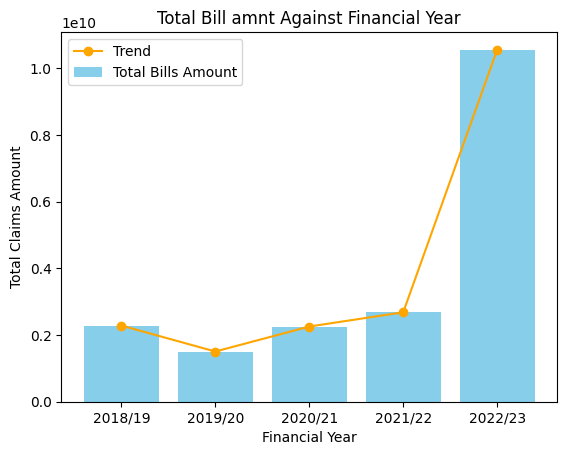

In [251]:
import matplotlib.pyplot as plt

# Calculate the total claims for each financial year
claims_by_year = inpatient_claims.groupby('origin FY')['Bill Amt'].sum()

# Plot the bar plot
plt.bar(claims_by_year.index, claims_by_year, color='skyblue', label='Total Bills Amount')

# Plot the trend line
plt.plot(claims_by_year.index, claims_by_year, marker='o', color='orange', label='Trend')

# Add labels and title
plt.xlabel('Financial Year')
plt.ylabel('Total Claims Amount')
plt.title('Total Bill amnt Against Financial Year')

# Add legend
plt.legend()

# Show the plot
plt.show()



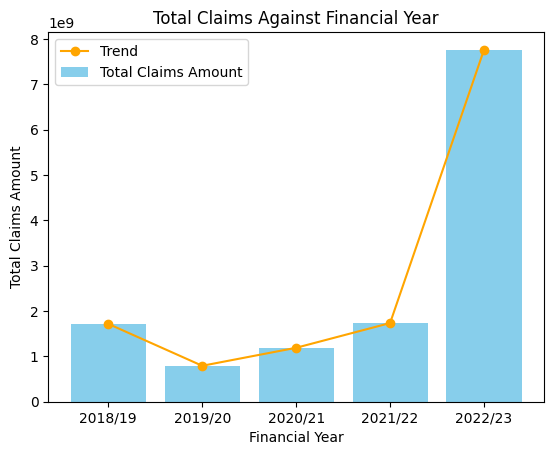

In [252]:
# Calculate the total claims for each financial year
claims_by_year = inpatient_claims.groupby('origin FY')['Claim Amt'].sum()

# Plot the bar plot
plt.bar(claims_by_year.index, claims_by_year, color='skyblue', label='Total Claims Amount')

# Plot the trend line
plt.plot(claims_by_year.index, claims_by_year, marker='o', color='orange', label='Trend')

# Add labels and title
plt.xlabel('Financial Year')
plt.ylabel('Total Claims Amount')
plt.title('Total Claims Against Financial Year')

# Add legend
plt.legend()

# Show the plot
plt.show()

<Axes: >

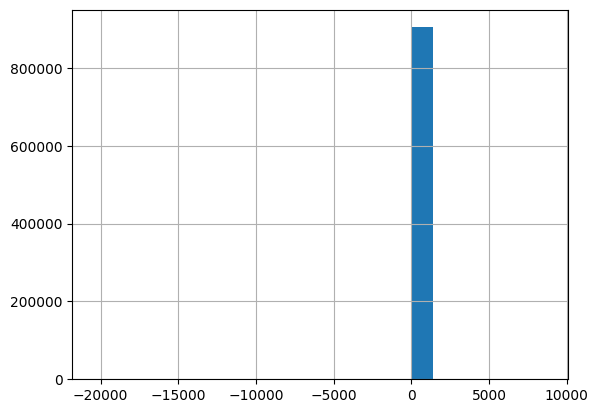

In [253]:
inpatient_claims['days'].hist(bins=20)

Many ML models prefer a Gaussian or normal distribution. If the distribution isn't normal, we can fix that with:

*   Scaling - min-max scaling
*   Normalization

*   Transformation - box cox, yeo johnson








#Box and whisker plot

<Axes: >

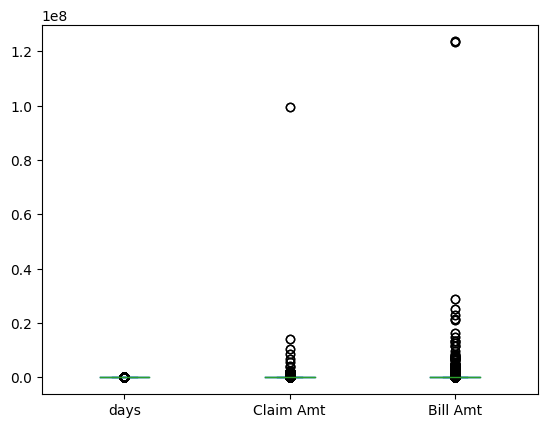

In [255]:
inpatient_claims.plot(kind="box", layout=(3,3), sharex=False)

<Axes: >

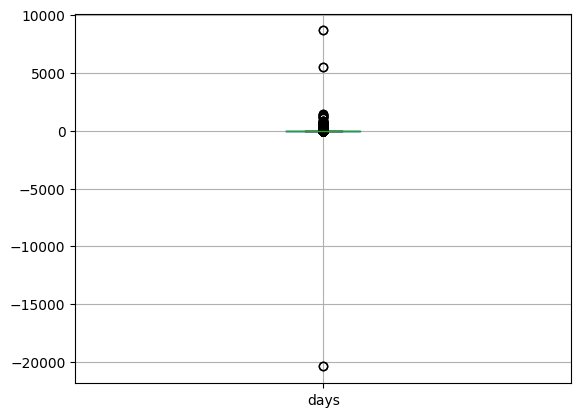

In [256]:
inpatient_claims.boxplot('days')

In [257]:
inpatient_claims.corr()

,days,Claim Amt,Bill Amt
days,1.000000,0.012350,0.012919
Claim Amt,0.012350,1.000000,0.054126
Bill Amt,0.012919,0.054126,1.000000


Threshold for correlation - z-score, IQR
measures the linear relationship between two variables.

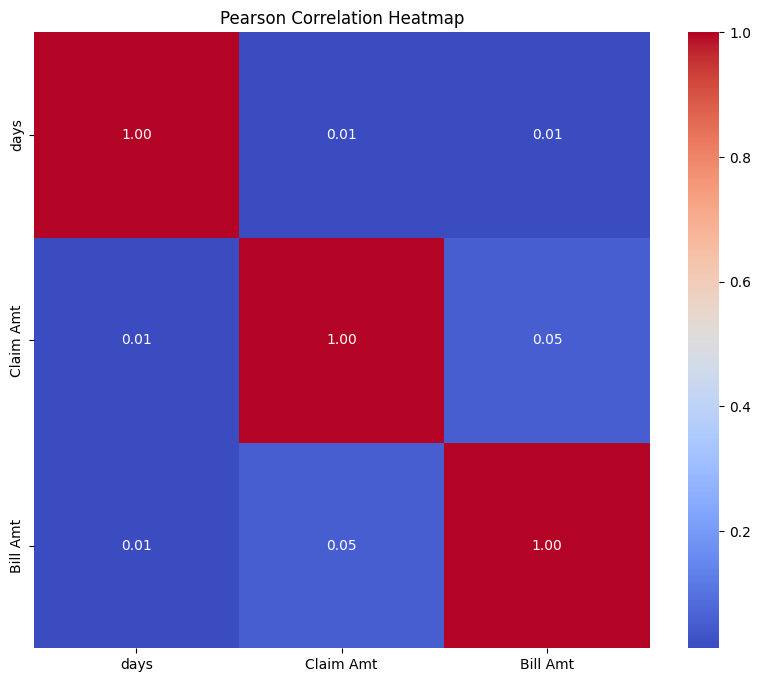

In [258]:
# Calculate the Pearson correlation matrix
corr_matrix = inpatient_claims.corr()

# Draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Pearson Correlation Heatmap')
plt.show()

There is negliggible correlation between the claim amount,bill amount and days

What to look for in data


1.   Missing data

*   Impute-mean,mode,median,KNN

2.   Outliers
Detecting - zScore, inter-quartile range, standard deviation
Distribution ==
Gaussian distribution - histogram, density plot, whisker,box
Categorical features - text-like
Encode - one-hot encoding, label encoding
Correlation ==
Detect using correlation matrix, pearson correlation heatmap
Feature selection - curse of dimensionality
PCA








#Dealing with dates

Admission date
The date follows a dd/mm/yyyy format.

Test each date to make sure it's correct

In [259]:
inpatient_claims.loc[452442:, 'branch'] = inpatient_claims.loc[452442:, 'voucher date'].values
inpatient_claims

inpatient_claims.loc[452442:, 'voucher date'] = np.nan
inpatient_claims

,r/ship,hcp name,hcp cat,hcp level,admission date,discharge date,days,received date,origin FY,disease,status,scheme,Claim Amt,Bill Amt,voucher date,branch,county,days till notice
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,08/08/2020,08/08/2020,0.0,02/09/1998,2020/21,C20,U,RETIREES,16000.0,8000.0,NaN,K N H BRANCH,NAIROBI,-8216 days
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,12/06/2021,13/06/2021,1.0,23/04/1999,2020/21,J18.9,RH,NHS,1800.0,77330.0,NaN,KAKAMEGA BRANCH,KAKAMEGA,-8263 days
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,21/10/2020,25/10/2020,4.0,04/09/1998,2020/21,K63.9,AA,NHS,50000.0,50000.0,NaN,THIKA BRANCH,KIAMBU,-8231 days
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,04/10/2018,07/10/2018,3.0,02/09/1998,2018/19,A49,RA,Blank,3600.0,3600.0,NaN,KISUMU BRANCH,KISUMU,-7365 days
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,25/08/2018,25/08/2018,0.0,05/12/2002,2018/19,O80.0,RA,NHS,17000.0,3439.0,NaN,MIGORI BRANCH,MIGORI,-5949 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,NaN,MURANG'A BRANCH,NaN,74 days
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,NaN,MURANG'A BRANCH,NaN,74 days
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,14/04/2023,14/04/2023,0.0,29/07/2023,2022/23,O80.0,AA,LINDA MAMA,5000.0,5000.0,NaN,MURANG'A BRANCH,NaN,106 days
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,NaN,MURANG'A BRANCH,NaN,74 days


In [260]:
def percent_na(col):
    return(col.isna().sum()/len(inpatient_claims))

inpatient_claims.apply(percent_na)

r/ship              0.000000
hcp name            0.000000
hcp cat             0.000000
hcp level           0.003667
admission date      0.000000
discharge date      0.003989
days                0.000004
received date       0.000000
origin FY           0.000000
disease             0.040949
status              0.000619
scheme              0.000000
Claim Amt           0.000075
Bill Amt            0.004703
voucher date        0.760692
branch              0.000000
county              0.500000
days till notice    0.000000
dtype: float64

Dropping voucher date because more than 50% of it is blank

In [261]:
inpatient_claims = inpatient_claims.drop(columns = ['voucher date'])
inpatient_claims

,r/ship,hcp name,hcp cat,hcp level,admission date,discharge date,days,received date,origin FY,disease,status,scheme,Claim Amt,Bill Amt,branch,county,days till notice
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,08/08/2020,08/08/2020,0.0,02/09/1998,2020/21,C20,U,RETIREES,16000.0,8000.0,K N H BRANCH,NAIROBI,-8216 days
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,12/06/2021,13/06/2021,1.0,23/04/1999,2020/21,J18.9,RH,NHS,1800.0,77330.0,KAKAMEGA BRANCH,KAKAMEGA,-8263 days
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,21/10/2020,25/10/2020,4.0,04/09/1998,2020/21,K63.9,AA,NHS,50000.0,50000.0,THIKA BRANCH,KIAMBU,-8231 days
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,04/10/2018,07/10/2018,3.0,02/09/1998,2018/19,A49,RA,Blank,3600.0,3600.0,KISUMU BRANCH,KISUMU,-7365 days
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,25/08/2018,25/08/2018,0.0,05/12/2002,2018/19,O80.0,RA,NHS,17000.0,3439.0,MIGORI BRANCH,MIGORI,-5949 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,14/04/2023,14/04/2023,0.0,29/07/2023,2022/23,O80.0,AA,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,106 days
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,18/05/2023,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days


In [262]:
inpatient_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904884 entries, 0 to 904883
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   r/ship            904884 non-null  object         
 1   hcp name          904884 non-null  object         
 2   hcp cat           904884 non-null  object         
 3   hcp level         901566 non-null  object         
 4   admission date    904884 non-null  object         
 5   discharge date    901274 non-null  object         
 6   days              904880 non-null  float64        
 7   received date     904884 non-null  object         
 8   origin FY         904884 non-null  object         
 9   disease           867830 non-null  object         
 10  status            904324 non-null  object         
 11  scheme            904884 non-null  object         
 12  Claim Amt         904816 non-null  float64        
 13  Bill Amt          900628 non-null  float64  

In [263]:
def print_arr(arr):
  for x in arr:
    print(x)

In [264]:
try:
    inpatient_claims['admission date'] = pd.to_datetime(inpatient_claims['admission date'], format='%d/%m/%Y', errors='raise')
    print("All dates are valid.")
except ValueError as e:
    print("Error:", e)
inpatient_claims

All dates are valid.


,r/ship,hcp name,hcp cat,hcp level,admission date,discharge date,days,received date,origin FY,disease,status,scheme,Claim Amt,Bill Amt,branch,county,days till notice
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,2020-08-08,08/08/2020,0.0,02/09/1998,2020/21,C20,U,RETIREES,16000.0,8000.0,K N H BRANCH,NAIROBI,-8216 days
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,2021-06-12,13/06/2021,1.0,23/04/1999,2020/21,J18.9,RH,NHS,1800.0,77330.0,KAKAMEGA BRANCH,KAKAMEGA,-8263 days
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,2020-10-21,25/10/2020,4.0,04/09/1998,2020/21,K63.9,AA,NHS,50000.0,50000.0,THIKA BRANCH,KIAMBU,-8231 days
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,2018-10-04,07/10/2018,3.0,02/09/1998,2018/19,A49,RA,Blank,3600.0,3600.0,KISUMU BRANCH,KISUMU,-7365 days
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,2018-08-25,25/08/2018,0.0,05/12/2002,2018/19,O80.0,RA,NHS,17000.0,3439.0,MIGORI BRANCH,MIGORI,-5949 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,2023-05-18,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,2023-05-18,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,2023-04-14,14/04/2023,0.0,29/07/2023,2022/23,O80.0,AA,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,106 days
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,2023-05-18,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days


In [265]:
inpatient_claims['admission_day'] = inpatient_claims['admission date'].dt.day
inpatient_claims['admission_month'] = inpatient_claims['admission date'].dt.month
inpatient_claims['admission_year'] = inpatient_claims['admission date'].dt.year
inpatient_claims = inpatient_claims.drop(columns=['admission date'])
inpatient_claims

,r/ship,hcp name,hcp cat,hcp level,discharge date,days,received date,origin FY,disease,status,scheme,Claim Amt,Bill Amt,branch,county,days till notice,admission_day,admission_month,admission_year
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,08/08/2020,0.0,02/09/1998,2020/21,C20,U,RETIREES,16000.0,8000.0,K N H BRANCH,NAIROBI,-8216 days,8,8,2020
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,13/06/2021,1.0,23/04/1999,2020/21,J18.9,RH,NHS,1800.0,77330.0,KAKAMEGA BRANCH,KAKAMEGA,-8263 days,12,6,2021
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,25/10/2020,4.0,04/09/1998,2020/21,K63.9,AA,NHS,50000.0,50000.0,THIKA BRANCH,KIAMBU,-8231 days,21,10,2020
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,07/10/2018,3.0,02/09/1998,2018/19,A49,RA,Blank,3600.0,3600.0,KISUMU BRANCH,KISUMU,-7365 days,4,10,2018
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,25/08/2018,0.0,05/12/2002,2018/19,O80.0,RA,NHS,17000.0,3439.0,MIGORI BRANCH,MIGORI,-5949 days,25,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,14/04/2023,0.0,29/07/2023,2022/23,O80.0,AA,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,106 days,14,4,2023
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023


In [266]:
try:
    inpatient_claims['discharge date'] = pd.to_datetime(inpatient_claims['discharge date'], format='%d/%m/%Y', errors='raise')
    print("All discharge dates are valid.")
except ValueError as e:
    print("Error:", e)
inpatient_claims

Error: Out of bounds nanosecond timestamp: 19-03-03 00:00:00


,r/ship,hcp name,hcp cat,hcp level,discharge date,days,received date,origin FY,disease,status,scheme,Claim Amt,Bill Amt,branch,county,days till notice,admission_day,admission_month,admission_year
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,08/08/2020,0.0,02/09/1998,2020/21,C20,U,RETIREES,16000.0,8000.0,K N H BRANCH,NAIROBI,-8216 days,8,8,2020
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,13/06/2021,1.0,23/04/1999,2020/21,J18.9,RH,NHS,1800.0,77330.0,KAKAMEGA BRANCH,KAKAMEGA,-8263 days,12,6,2021
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,25/10/2020,4.0,04/09/1998,2020/21,K63.9,AA,NHS,50000.0,50000.0,THIKA BRANCH,KIAMBU,-8231 days,21,10,2020
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,07/10/2018,3.0,02/09/1998,2018/19,A49,RA,Blank,3600.0,3600.0,KISUMU BRANCH,KISUMU,-7365 days,4,10,2018
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,25/08/2018,0.0,05/12/2002,2018/19,O80.0,RA,NHS,17000.0,3439.0,MIGORI BRANCH,MIGORI,-5949 days,25,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,14/04/2023,0.0,29/07/2023,2022/23,O80.0,AA,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,106 days,14,4,2023
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,19/05/2023,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023


In [267]:
inpatient_claims['discharge date'].iloc[471483]

'03/03/2019'

Changing the date that caused an error to the correct format

In [268]:
date_string = '19-03-03'
datetime_object = pd.to_datetime(date_string, format='%d-%m-%y')
print(datetime_object)

2003-03-19 00:00:00


using errors=coerce instead of ignore to coerce any problematic values to NaT(not a time) which will make it easier to identify them

In [269]:
inpatient_claims['discharge date'] = pd.to_datetime(inpatient_claims['discharge date'], format='%d/%m/%Y', errors='coerce')

print(inpatient_claims['discharge date'].dtype)

datetime64[ns]


In [270]:
 inpatient_claims['discharge date'] = pd.to_datetime(inpatient_claims['discharge date'], format='%d/%m/%Y', errors='ignore')
 inpatient_claims['discharge_day'] = inpatient_claims['discharge date'].dt.day
 inpatient_claims['discharge_month'] = inpatient_claims['discharge date'].dt.month
 inpatient_claims['discharge_year'] = inpatient_claims['discharge date'].dt.year
 inpatient_claims = inpatient_claims.drop(columns=['discharge date'])
 inpatient_claims

,r/ship,hcp name,hcp cat,hcp level,days,received date,origin FY,disease,status,scheme,...,Bill Amt,branch,county,days till notice,admission_day,admission_month,admission_year,discharge_day,discharge_month,discharge_year
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,0.0,02/09/1998,2020/21,C20,U,RETIREES,...,8000.0,K N H BRANCH,NAIROBI,-8216 days,8,8,2020,8.0,8.0,2020.0
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,1.0,23/04/1999,2020/21,J18.9,RH,NHS,...,77330.0,KAKAMEGA BRANCH,KAKAMEGA,-8263 days,12,6,2021,13.0,6.0,2021.0
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,4.0,04/09/1998,2020/21,K63.9,AA,NHS,...,50000.0,THIKA BRANCH,KIAMBU,-8231 days,21,10,2020,25.0,10.0,2020.0
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,3.0,02/09/1998,2018/19,A49,RA,Blank,...,3600.0,KISUMU BRANCH,KISUMU,-7365 days,4,10,2018,7.0,10.0,2018.0
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,0.0,05/12/2002,2018/19,O80.0,RA,NHS,...,3439.0,MIGORI BRANCH,MIGORI,-5949 days,25,8,2018,25.0,8.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,...,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023,19.0,5.0,2023.0
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,...,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023,19.0,5.0,2023.0
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,0.0,29/07/2023,2022/23,O80.0,AA,LINDA MAMA,...,5000.0,MURANG'A BRANCH,NaN,106 days,14,4,2023,14.0,4.0,2023.0
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,31/07/2023,2022/23,O80.0,AP,LINDA MAMA,...,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023,19.0,5.0,2023.0


converting discharge dates(day, month,year) to numeric values

In [271]:
inpatient_claims['discharge_day'] = inpatient_claims['discharge_day'].apply(pd.to_numeric, errors='coerce')
inpatient_claims['discharge_month'] = inpatient_claims['discharge_month'].apply(pd.to_numeric, errors='coerce')
inpatient_claims['discharge_year'] = inpatient_claims['discharge_year'].apply(pd.to_numeric, errors='coerce')

In [272]:
inpatient_claims.head()

,r/ship,hcp name,hcp cat,hcp level,days,received date,origin FY,disease,status,scheme,...,Bill Amt,branch,county,days till notice,admission_day,admission_month,admission_year,discharge_day,discharge_month,discharge_year
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,0.0,02/09/1998,2020/21,C20,U,RETIREES,...,8000.0,K N H BRANCH,NAIROBI,-8216 days,8,8,2020,8.0,8.0,2020.0
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,1.0,23/04/1999,2020/21,J18.9,RH,NHS,...,77330.0,KAKAMEGA BRANCH,KAKAMEGA,-8263 days,12,6,2021,13.0,6.0,2021.0
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,4.0,04/09/1998,2020/21,K63.9,AA,NHS,...,50000.0,THIKA BRANCH,KIAMBU,-8231 days,21,10,2020,25.0,10.0,2020.0
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,3.0,02/09/1998,2018/19,A49,RA,Blank,...,3600.0,KISUMU BRANCH,KISUMU,-7365 days,4,10,2018,7.0,10.0,2018.0
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,0.0,05/12/2002,2018/19,O80.0,RA,NHS,...,3439.0,MIGORI BRANCH,MIGORI,-5949 days,25,8,2018,25.0,8.0,2018.0


In [273]:
try:
    inpatient_claims['received date'] = pd.to_datetime(inpatient_claims['received date'], format='%d/%m/%Y', errors='raise')
    print("All received dates are valid.")
except ValueError as e:
    print("Error:", e)
inpatient_claims

All received dates are valid.


,r/ship,hcp name,hcp cat,hcp level,days,received date,origin FY,disease,status,scheme,...,Bill Amt,branch,county,days till notice,admission_day,admission_month,admission_year,discharge_day,discharge_month,discharge_year
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,0.0,1998-09-02,2020/21,C20,U,RETIREES,...,8000.0,K N H BRANCH,NAIROBI,-8216 days,8,8,2020,8.0,8.0,2020.0
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,1.0,1999-04-23,2020/21,J18.9,RH,NHS,...,77330.0,KAKAMEGA BRANCH,KAKAMEGA,-8263 days,12,6,2021,13.0,6.0,2021.0
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,4.0,1998-09-04,2020/21,K63.9,AA,NHS,...,50000.0,THIKA BRANCH,KIAMBU,-8231 days,21,10,2020,25.0,10.0,2020.0
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,3.0,1998-09-02,2018/19,A49,RA,Blank,...,3600.0,KISUMU BRANCH,KISUMU,-7365 days,4,10,2018,7.0,10.0,2018.0
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,0.0,2002-12-05,2018/19,O80.0,RA,NHS,...,3439.0,MIGORI BRANCH,MIGORI,-5949 days,25,8,2018,25.0,8.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,2023-07-31,2022/23,O80.0,AP,LINDA MAMA,...,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023,19.0,5.0,2023.0
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,2023-07-31,2022/23,O80.0,AP,LINDA MAMA,...,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023,19.0,5.0,2023.0
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,0.0,2023-07-29,2022/23,O80.0,AA,LINDA MAMA,...,5000.0,MURANG'A BRANCH,NaN,106 days,14,4,2023,14.0,4.0,2023.0
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,2023-07-31,2022/23,O80.0,AP,LINDA MAMA,...,5000.0,MURANG'A BRANCH,NaN,74 days,18,5,2023,19.0,5.0,2023.0


In [274]:
inpatient_claims['received_day'] = inpatient_claims['received date'].dt.day
inpatient_claims['received_month'] = inpatient_claims['received date'].dt.month
inpatient_claims['received_year'] = inpatient_claims['received date'].dt.year
inpatient_claims = inpatient_claims.drop(columns=['received date'])
inpatient_claims

,r/ship,hcp name,hcp cat,hcp level,days,origin FY,disease,status,scheme,Claim Amt,...,days till notice,admission_day,admission_month,admission_year,discharge_day,discharge_month,discharge_year,received_day,received_month,received_year
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,0.0,2020/21,C20,U,RETIREES,16000.0,...,-8216 days,8,8,2020,8.0,8.0,2020.0,2,9,1998
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,1.0,2020/21,J18.9,RH,NHS,1800.0,...,-8263 days,12,6,2021,13.0,6.0,2021.0,23,4,1999
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,4.0,2020/21,K63.9,AA,NHS,50000.0,...,-8231 days,21,10,2020,25.0,10.0,2020.0,4,9,1998
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,3.0,2018/19,A49,RA,Blank,3600.0,...,-7365 days,4,10,2018,7.0,10.0,2018.0,2,9,1998
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,0.0,2018/19,O80.0,RA,NHS,17000.0,...,-5949 days,25,8,2018,25.0,8.0,2018.0,5,12,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,2022/23,O80.0,AP,LINDA MAMA,5000.0,...,74 days,18,5,2023,19.0,5.0,2023.0,31,7,2023
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,2022/23,O80.0,AP,LINDA MAMA,5000.0,...,74 days,18,5,2023,19.0,5.0,2023.0,31,7,2023
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,0.0,2022/23,O80.0,AA,LINDA MAMA,5000.0,...,106 days,14,4,2023,14.0,4.0,2023.0,29,7,2023
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,2022/23,O80.0,AP,LINDA MAMA,5000.0,...,74 days,18,5,2023,19.0,5.0,2023.0,31,7,2023


#One hot encoding and label ecoding

Financial year

In [275]:
financial_years = inpatient_claims['origin FY'].unique()
print(f'Number of distinct financial years: {len(financial_years)}')
for x in financial_years:
  print(x)

Number of distinct financial years: 5
2020/21
2018/19
2022/23
2019/20
2021/22


Since we have 5 discrete financial years, we can one-hot encode them.

In [276]:
inpatient_claims = pd.get_dummies(inpatient_claims, columns=['origin FY'])
inpatient_claims

,r/ship,hcp name,hcp cat,hcp level,days,disease,status,scheme,Claim Amt,Bill Amt,...,discharge_month,discharge_year,received_day,received_month,received_year,origin FY_2018/19,origin FY_2019/20,origin FY_2020/21,origin FY_2021/22,origin FY_2022/23
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,G,6,0.0,C20,U,RETIREES,16000.0,8000.0,...,8.0,2020.0,2,9,1998,0,0,1,0,0
1,M,FRIENDS KAIMOSI HOSPITAL,M,NaN,1.0,J18.9,RH,NHS,1800.0,77330.0,...,6.0,2021.0,23,4,1999,0,0,1,0,0
2,M,ST. MATIA MULUMBA HOSPITAL,M,4,4.0,K63.9,AA,NHS,50000.0,50000.0,...,10.0,2020.0,4,9,1998,0,0,1,0,0
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,P,4,3.0,A49,RA,Blank,3600.0,3600.0,...,10.0,2018.0,2,9,1998,1,0,0,0,0
4,M,ST. ROBERT SILVER MATERNITY & NURSING,P,NaN,0.0,O80.0,RA,NHS,17000.0,3439.0,...,8.0,2018.0,5,12,2002,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,O80.0,AP,LINDA MAMA,5000.0,5000.0,...,5.0,2023.0,31,7,2023,0,0,0,0,1
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,O80.0,AP,LINDA MAMA,5000.0,5000.0,...,5.0,2023.0,31,7,2023,0,0,0,0,1
904881,M,MURIRANJA DISTRICT HOSPITAL,G,4,0.0,O80.0,AA,LINDA MAMA,5000.0,5000.0,...,4.0,2023.0,29,7,2023,0,0,0,0,1
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,G,4,1.0,O80.0,AP,LINDA MAMA,5000.0,5000.0,...,5.0,2023.0,31,7,2023,0,0,0,0,1


#Relationship:


In [277]:
print_arr(inpatient_claims['r/ship'].unique())


M
D
S


M-Member

D-Dependent(children)

S-spouse

Algorithms to check for typo errors

#Hospital category

In [278]:
print_arr(inpatient_claims['hcp cat'].unique())

G
M
P


Abbreviated values:

| Abbreviation | Full |
| --- | --- |
| G | Government hospital |
| M | Mission hospital |
| P | Private hospital |

In [279]:
# prompt: Map value abbreviations for hcp cat column

hcp_cat_mapping = {
    'G': 'Government hospital',
    'M': 'Mission hospital',
    'P': 'Private hospital'
}

inpatient_claims['hcp cat'] = inpatient_claims['hcp cat'].map(hcp_cat_mapping)
print_arr(inpatient_claims['hcp cat'].unique())


Government hospital
Mission hospital
Private hospital


In [280]:
inpatient_claims = pd.get_dummies(inpatient_claims, columns=['hcp cat'])
inpatient_claims

,r/ship,hcp name,hcp level,days,disease,status,scheme,Claim Amt,Bill Amt,branch,...,received_month,received_year,origin FY_2018/19,origin FY_2019/20,origin FY_2020/21,origin FY_2021/22,origin FY_2022/23,hcp cat_Government hospital,hcp cat_Mission hospital,hcp cat_Private hospital
0,M,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,6,0.0,C20,U,RETIREES,16000.0,8000.0,K N H BRANCH,...,9,1998,0,0,1,0,0,1,0,0
1,M,FRIENDS KAIMOSI HOSPITAL,NaN,1.0,J18.9,RH,NHS,1800.0,77330.0,KAKAMEGA BRANCH,...,4,1999,0,0,1,0,0,0,1,0
2,M,ST. MATIA MULUMBA HOSPITAL,4,4.0,K63.9,AA,NHS,50000.0,50000.0,THIKA BRANCH,...,9,1998,0,0,1,0,0,0,1,0
3,D,THE PORT FLORENCE COMMUNITY HOSPITAL,4,3.0,A49,RA,Blank,3600.0,3600.0,KISUMU BRANCH,...,9,1998,1,0,0,0,0,0,0,1
4,M,ST. ROBERT SILVER MATERNITY & NURSING,NaN,0.0,O80.0,RA,NHS,17000.0,3439.0,MIGORI BRANCH,...,12,2002,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,M,KIRWARA SUB-DISTRICT HOSPITAL,4,1.0,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,...,7,2023,0,0,0,0,1,1,0,0
904880,M,KIRWARA SUB-DISTRICT HOSPITAL,4,1.0,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,...,7,2023,0,0,0,0,1,1,0,0
904881,M,MURIRANJA DISTRICT HOSPITAL,4,0.0,O80.0,AA,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,...,7,2023,0,0,0,0,1,1,0,0
904882,M,KIRWARA SUB-DISTRICT HOSPITAL,4,1.0,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,...,7,2023,0,0,0,0,1,1,0,0


In [281]:
inpatient_claims = pd.get_dummies(inpatient_claims, columns=['r/ship'])
inpatient_claims

,hcp name,hcp level,days,disease,status,scheme,Claim Amt,Bill Amt,branch,county,...,origin FY_2019/20,origin FY_2020/21,origin FY_2021/22,origin FY_2022/23,hcp cat_Government hospital,hcp cat_Mission hospital,hcp cat_Private hospital,r/ship_D,r/ship_M,r/ship_S
0,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,6,0.0,C20,U,RETIREES,16000.0,8000.0,K N H BRANCH,NAIROBI,...,0,1,0,0,1,0,0,0,1,0
1,FRIENDS KAIMOSI HOSPITAL,NaN,1.0,J18.9,RH,NHS,1800.0,77330.0,KAKAMEGA BRANCH,KAKAMEGA,...,0,1,0,0,0,1,0,0,1,0
2,ST. MATIA MULUMBA HOSPITAL,4,4.0,K63.9,AA,NHS,50000.0,50000.0,THIKA BRANCH,KIAMBU,...,0,1,0,0,0,1,0,0,1,0
3,THE PORT FLORENCE COMMUNITY HOSPITAL,4,3.0,A49,RA,Blank,3600.0,3600.0,KISUMU BRANCH,KISUMU,...,0,0,0,0,0,0,1,1,0,0
4,ST. ROBERT SILVER MATERNITY & NURSING,NaN,0.0,O80.0,RA,NHS,17000.0,3439.0,MIGORI BRANCH,MIGORI,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,KIRWARA SUB-DISTRICT HOSPITAL,4,1.0,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,...,0,0,0,1,1,0,0,0,1,0
904880,KIRWARA SUB-DISTRICT HOSPITAL,4,1.0,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,...,0,0,0,1,1,0,0,0,1,0
904881,MURIRANJA DISTRICT HOSPITAL,4,0.0,O80.0,AA,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,...,0,0,0,1,1,0,0,0,1,0
904882,KIRWARA SUB-DISTRICT HOSPITAL,4,1.0,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,...,0,0,0,1,1,0,0,0,1,0


In [282]:
print_arr(inpatient_claims['hcp name'].unique())

KENYATTA NATIONAL HOSPITAL (GENERAL WARD
FRIENDS KAIMOSI HOSPITAL
ST. MATIA MULUMBA HOSPITAL
THE PORT FLORENCE COMMUNITY HOSPITAL
ST. ROBERT SILVER MATERNITY & NURSING
MOMBASA HOSPITAL ASSOCIATION
COAST GENERAL HOSPITAL (MOMBASA)
NAZARETH HOSPITAL  RIARA RIDGE
THE KITUI MATERNITY & NURSING HOME
A.I.C KAPSOWAR HOSPITAL (ELDORET)
MARAGUA DISTRICT HOSPITAL
THE LIGHT NAIVASHA DOCTORS PLAZA
LADY GRIGGS MATERNITY HOSPITAL
S.S. LEAGUE M.P SHAH HOSPITAL  NAIROBI
MAMA LUCY KIBAKI HOSPITAL
ITEN COUNTY REFERAL HOSPITAL
NAIROBI WOMEN'S HOSPITAL KITENGELA MEDICAL CLINIC
H.H AGA KHAN DISP. & MAT. HOSPITAL KISUM
BENMAC HEALTH CLINIC
VINEYARD HOSPITAL
NAIROBI WEST HOSPITAL
ST.TERESA HOSPITAL KIAMBU
CONSOLATA HOSPITAL (NYERI)
NORTH KINANGOP CATHOLIC HOSPITAL
KAPENGURIA DISTRICT HOSPITAL
EMBU LEVEL 5 HOSPITAL
ST. MARY'S HOSPITAL (MUMIAS)
ATHI-RIVER SHALOM COMMUNITY HOSPITAL
A.I.C. LITEIN COTTAGE HOSPITAL KERICHO
ST. CLARES MISSION HOSPITAL (KAPLONG)
RIFT VALLEY PROV. GENERAL HOSP. NAKURU
HOLY FAMILY HOS

In [283]:
inpatient_claims.shape

(904884, 31)

In [284]:
inpatient_claims

,hcp name,hcp level,days,disease,status,scheme,Claim Amt,Bill Amt,branch,county,...,origin FY_2019/20,origin FY_2020/21,origin FY_2021/22,origin FY_2022/23,hcp cat_Government hospital,hcp cat_Mission hospital,hcp cat_Private hospital,r/ship_D,r/ship_M,r/ship_S
0,KENYATTA NATIONAL HOSPITAL (GENERAL WARD,6,0.0,C20,U,RETIREES,16000.0,8000.0,K N H BRANCH,NAIROBI,...,0,1,0,0,1,0,0,0,1,0
1,FRIENDS KAIMOSI HOSPITAL,NaN,1.0,J18.9,RH,NHS,1800.0,77330.0,KAKAMEGA BRANCH,KAKAMEGA,...,0,1,0,0,0,1,0,0,1,0
2,ST. MATIA MULUMBA HOSPITAL,4,4.0,K63.9,AA,NHS,50000.0,50000.0,THIKA BRANCH,KIAMBU,...,0,1,0,0,0,1,0,0,1,0
3,THE PORT FLORENCE COMMUNITY HOSPITAL,4,3.0,A49,RA,Blank,3600.0,3600.0,KISUMU BRANCH,KISUMU,...,0,0,0,0,0,0,1,1,0,0
4,ST. ROBERT SILVER MATERNITY & NURSING,NaN,0.0,O80.0,RA,NHS,17000.0,3439.0,MIGORI BRANCH,MIGORI,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,KIRWARA SUB-DISTRICT HOSPITAL,4,1.0,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,...,0,0,0,1,1,0,0,0,1,0
904880,KIRWARA SUB-DISTRICT HOSPITAL,4,1.0,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,...,0,0,0,1,1,0,0,0,1,0
904881,MURIRANJA DISTRICT HOSPITAL,4,0.0,O80.0,AA,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,...,0,0,0,1,1,0,0,0,1,0
904882,KIRWARA SUB-DISTRICT HOSPITAL,4,1.0,O80.0,AP,LINDA MAMA,5000.0,5000.0,MURANG'A BRANCH,NaN,...,0,0,0,1,1,0,0,0,1,0


In [287]:
#50% of counties is blank
inpatient_claims = inpatient_claims.drop(columns = ['county'])
inpatient_claims.shape

KeyError: "['county'] not found in axis"

In [288]:
inpatient_claims.columns

Index(['hcp name', 'hcp level', 'days', 'disease', 'status', 'scheme',
       'Claim Amt', 'Bill Amt', 'branch', 'days till notice', 'admission_day',
       'admission_month', 'admission_year', 'discharge_day', 'discharge_month',
       'discharge_year', 'received_day', 'received_month', 'received_year',
       'origin FY_2018/19', 'origin FY_2019/20', 'origin FY_2020/21',
       'origin FY_2021/22', 'origin FY_2022/23', 'hcp cat_Government hospital',
       'hcp cat_Mission hospital', 'hcp cat_Private hospital', 'r/ship_D',
       'r/ship_M', 'r/ship_S'],
      dtype='object')

# Isolation Forest
for anomaly detection

In [289]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

In [290]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [291]:
features = ['days','Claim Amt','Bill Amt','days till notice','admission_month','discharge_month','received_month','hcp cat_Government hospital','hcp cat_Mission hospital','hcp cat_Private hospital','r/ship_D','r/ship_M','r/ship_S']
x_train = inpatient_claims[features]
x_train.dtypes

days                                   float64
Claim Amt                              float64
Bill Amt                               float64
days till notice               timedelta64[ns]
admission_month                          int64
discharge_month                        float64
received_month                           int64
hcp cat_Government hospital              uint8
hcp cat_Mission hospital                 uint8
hcp cat_Private hospital                 uint8
r/ship_D                                 uint8
r/ship_M                                 uint8
r/ship_S                                 uint8
dtype: object

In [292]:
x_train['days till notice'] = x_train['days till notice'].dt.days.astype(int)

In [293]:
x_train

,days,Claim Amt,Bill Amt,days till notice,admission_month,discharge_month,received_month,hcp cat_Government hospital,hcp cat_Mission hospital,hcp cat_Private hospital,r/ship_D,r/ship_M,r/ship_S
0,0.0,16000.0,8000.0,-8216,8,8.0,9,1,0,0,0,1,0
1,1.0,1800.0,77330.0,-8263,6,6.0,4,0,1,0,0,1,0
2,4.0,50000.0,50000.0,-8231,10,10.0,9,0,1,0,0,1,0
3,3.0,3600.0,3600.0,-7365,10,10.0,9,0,0,1,1,0,0
4,0.0,17000.0,3439.0,-5949,8,8.0,12,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,1.0,5000.0,5000.0,74,5,5.0,7,1,0,0,0,1,0
904880,1.0,5000.0,5000.0,74,5,5.0,7,1,0,0,0,1,0
904881,0.0,5000.0,5000.0,106,4,4.0,7,1,0,0,0,1,0
904882,1.0,5000.0,5000.0,74,5,5.0,7,1,0,0,0,1,0


In [294]:
x_train.dtypes

days                           float64
Claim Amt                      float64
Bill Amt                       float64
days till notice                 int64
admission_month                  int64
discharge_month                float64
received_month                   int64
hcp cat_Government hospital      uint8
hcp cat_Mission hospital         uint8
hcp cat_Private hospital         uint8
r/ship_D                         uint8
r/ship_M                         uint8
r/ship_S                         uint8
dtype: object

In [295]:
x_train

,days,Claim Amt,Bill Amt,days till notice,admission_month,discharge_month,received_month,hcp cat_Government hospital,hcp cat_Mission hospital,hcp cat_Private hospital,r/ship_D,r/ship_M,r/ship_S
0,0.0,16000.0,8000.0,-8216,8,8.0,9,1,0,0,0,1,0
1,1.0,1800.0,77330.0,-8263,6,6.0,4,0,1,0,0,1,0
2,4.0,50000.0,50000.0,-8231,10,10.0,9,0,1,0,0,1,0
3,3.0,3600.0,3600.0,-7365,10,10.0,9,0,0,1,1,0,0
4,0.0,17000.0,3439.0,-5949,8,8.0,12,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,1.0,5000.0,5000.0,74,5,5.0,7,1,0,0,0,1,0
904880,1.0,5000.0,5000.0,74,5,5.0,7,1,0,0,0,1,0
904881,0.0,5000.0,5000.0,106,4,4.0,7,1,0,0,0,1,0
904882,1.0,5000.0,5000.0,74,5,5.0,7,1,0,0,0,1,0


In [296]:
x_train

,days,Claim Amt,Bill Amt,days till notice,admission_month,discharge_month,received_month,hcp cat_Government hospital,hcp cat_Mission hospital,hcp cat_Private hospital,r/ship_D,r/ship_M,r/ship_S
0,0.0,16000.0,8000.0,-8216,8,8.0,9,1,0,0,0,1,0
1,1.0,1800.0,77330.0,-8263,6,6.0,4,0,1,0,0,1,0
2,4.0,50000.0,50000.0,-8231,10,10.0,9,0,1,0,0,1,0
3,3.0,3600.0,3600.0,-7365,10,10.0,9,0,0,1,1,0,0
4,0.0,17000.0,3439.0,-5949,8,8.0,12,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
904879,1.0,5000.0,5000.0,74,5,5.0,7,1,0,0,0,1,0
904880,1.0,5000.0,5000.0,74,5,5.0,7,1,0,0,0,1,0
904881,0.0,5000.0,5000.0,106,4,4.0,7,1,0,0,0,1,0
904882,1.0,5000.0,5000.0,74,5,5.0,7,1,0,0,0,1,0


grouping the hospital level and hospital name columns to get the counts of unique hospitals that appear in the anomaly data and their levels.

In [197]:
# Group the DataFrame by both "hospital" and "hospital level" columns
#grouped = anomalies.groupby(['hcp name', 'hcp level'])

# Count the number of unique hospitals within each group
#unique_hospitals_per_level = grouped.size()

# Print the result
#print(unique_hospitals_per_level)

In [198]:
#anomalies['first letter'] = anomalies['disease'].str[0]

# Group the DataFrame by the first letter
#grouped = anomalies.groupby('first letter')

# Count the number of occurrences of each letter
#letter_counts = grouped.size()

# Print the result
#print(letter_counts)

#IF using anomaly scores and Grid search CV

In [297]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [298]:
features = ['days','Claim Amt','Bill Amt','days till notice','admission_month','discharge_month','received_month','admission_day','admission_day','admission_day']
xtrain = inpatient_claims[features]
xtrain.dtypes

days                        float64
Claim Amt                   float64
Bill Amt                    float64
days till notice    timedelta64[ns]
admission_month               int64
discharge_month             float64
received_month                int64
admission_day                 int64
admission_day                 int64
admission_day                 int64
dtype: object

In [299]:
xtrain['days till notice'] = xtrain['days till notice'].dt.days.astype(int)
xtrain.dtypes

days                float64
Claim Amt           float64
Bill Amt            float64
days till notice      int64
admission_month       int64
discharge_month     float64
received_month        int64
admission_day         int64
admission_day         int64
admission_day         int64
dtype: object

In [300]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data, replacing missing values
days_imputed = imputer.fit_transform(xtrain[['days']])

# Replace the original column with imputed values
xtrain['days'] = days_imputed

In [301]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data, replacing missing values
claim_imputed = imputer.fit_transform(xtrain[['Claim Amt']])

# Replace the original column with imputed values
xtrain['Claim Amt'] = claim_imputed

In [302]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data, replacing missing values
Bill_imputed = imputer.fit_transform(xtrain[['Bill Amt']])

# Replace the original column with imputed values
xtrain['Bill Amt'] = Bill_imputed

In [303]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data, replacing missing values
Bill_imputed = imputer.fit_transform(xtrain[['discharge_month']])

# Replace the original column with imputed values
xtrain['discharge_month'] = Bill_imputed

In [304]:
xtrain

,days,Claim Amt,Bill Amt,days till notice,admission_month,discharge_month,received_month,admission_day,admission_day,admission_day
0,0.0,16000.0,8000.0,-8216,8,8.0,9,8,8,8
1,1.0,1800.0,77330.0,-8263,6,6.0,4,12,12,12
2,4.0,50000.0,50000.0,-8231,10,10.0,9,21,21,21
3,3.0,3600.0,3600.0,-7365,10,10.0,9,4,4,4
4,0.0,17000.0,3439.0,-5949,8,8.0,12,25,25,25
...,...,...,...,...,...,...,...,...,...,...
904879,1.0,5000.0,5000.0,74,5,5.0,7,18,18,18
904880,1.0,5000.0,5000.0,74,5,5.0,7,18,18,18
904881,0.0,5000.0,5000.0,106,4,4.0,7,14,14,14
904882,1.0,5000.0,5000.0,74,5,5.0,7,18,18,18


In [305]:
xtrain.isna().sum()

days                0
Claim Amt           0
Bill Amt            0
days till notice    0
admission_month     0
discharge_month     0
received_month      0
admission_day       0
admission_day       0
admission_day       0
dtype: int64

In [306]:
xtrain.dtypes

days                float64
Claim Amt           float64
Bill Amt            float64
days till notice      int64
admission_month       int64
discharge_month     float64
received_month        int64
admission_day         int64
admission_day         int64
admission_day         int64
dtype: object

In [307]:

xtrain['days'] = xtrain['days'].astype(int)
xtrain['Claim Amt'] = xtrain['Claim Amt'].astype(int)
xtrain['Bill Amt'] = xtrain['Bill Amt'].astype(int)
xtrain['discharge_month'] = xtrain['discharge_month'].astype(int)
xtrain.dtypes

days                int64
Claim Amt           int64
Bill Amt            int64
days till notice    int64
admission_month     int64
discharge_month     int64
received_month      int64
admission_day       int64
admission_day       int64
admission_day       int64
dtype: object

In [308]:
# Standardize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(xtrain)
df_scaled = pd.DataFrame(df_scaled, columns=features)

In [309]:
# Train Isolation Forest model
model = IsolationForest(n_estimators = 150,contamination=0.01, random_state=42)
model.fit(df_scaled)

IsolationForest(contamination=0.01, n_estimators=150, random_state=42)

In [310]:
# Predict outliers
xtrain['anomaly_score'] = model.decision_function(df_scaled)
xtrain['anomaly'] = model.predict(df_scaled)

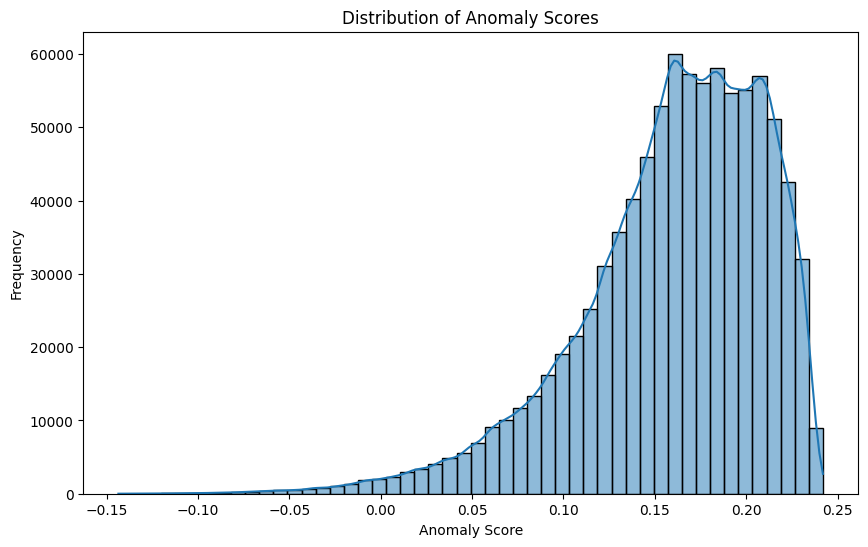

In [311]:
# Visualize anomaly scores
plt.figure(figsize=(10, 6))
sns.histplot(xtrain['anomaly_score'], bins=50, kde=True)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

In [312]:
# Check for potential fraud cases
potential_fraud = xtrain[xtrain['anomaly'] == -1]
print("Potential fraud cases:")
print(potential_fraud[features + ['anomaly_score']])

Potential fraud cases:
        days  Claim Amt  Bill Amt  days till notice  admission_month  \
6          1     250000    250000             -8061                5   
31         4     373330    373330              -110                9   
38        47      80000    206900               -71                3   
258        4     800000    885708              -333                7   
259        1     458572    458572              -193                7   
...      ...        ...       ...               ...              ...   
903621    66     231000    488481               104                4   
904548    31     108500    216713                62                5   
904767    32     250000    348200               102                4   
904768    28     300000    377200               176                5   
904769    24     300000    366800              -127                5   

        discharge_month  received_month  admission_day  admission_day  \
6                     5               4

In [313]:

X_train, X_test, y_train, y_test = train_test_split(df_scaled, xtrain['anomaly'], test_size=0.2, random_state=42)

# Train a classifier for evaluation
clf = IsolationForest(contamination = 0.01,random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          -1       0.82      0.81      0.82      1720
           1       1.00      1.00      1.00    179257

    accuracy                           1.00    180977
   macro avg       0.91      0.91      0.91    180977
weighted avg       1.00      1.00      1.00    180977



In [314]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, xtrain['anomaly'], test_size=0.2, random_state=42)

# Train a classifier for evaluation
clf = IsolationForest(contamination = 0.1,random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          -1       0.10      1.00      0.17      1720
           1       1.00      0.91      0.95    179257

    accuracy                           0.91    180977
   macro avg       0.55      0.95      0.56    180977
weighted avg       0.99      0.91      0.94    180977



In [315]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming clf is your classifier and X_test, y_test are your testing set
# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9095630936527846
Precision: 1.0
Recall: 0.9086953368627166
F1-score: 0.9521638360120065


In [316]:
# Find the indices of rows classified as anomalies (-1)
anomaly_indices = np.where(y_pred == -1)[0]

# Extract the rows from the initial dataset corresponding to these indices
anomalies_in_initial_dataset = inpatient_claims.iloc[anomaly_indices]

# Print the rows classified as anomalies in the initial dataset
anomalies_in_initial_dataset_df = pd.DataFrame(anomalies_in_initial_dataset)
print(anomalies_in_initial_dataset_df)

                                                 hcp name hcp level  days  \
1                                FRIENDS KAIMOSI HOSPITAL       NaN   1.0   
8                      THE KITUI MATERNITY & NURSING HOME        3B   2.0   
34      NAIROBI WOMEN'S HOSPITAL KITENGELA MEDICAL CLINIC         4   5.0   
38                                      VINEYARD HOSPITAL         4  47.0   
39                                  NAIROBI WEST HOSPITAL         6   0.0   
...                                                   ...       ...   ...   
180941                          NAIROBI HOSPITAL  NAIROBI        6B   0.0   
180947                          NAIROBI HOSPITAL  NAIROBI        6B   0.0   
180951                          NAIROBI HOSPITAL  NAIROBI        6B   0.0   
180952                                   ELDORET HOSPITAL        6B   0.0   
180962                            ANDERSON MEDICAL CENTRE        3B   0.0   

       disease status          scheme  Claim Amt   Bill Amt  \
1        J18

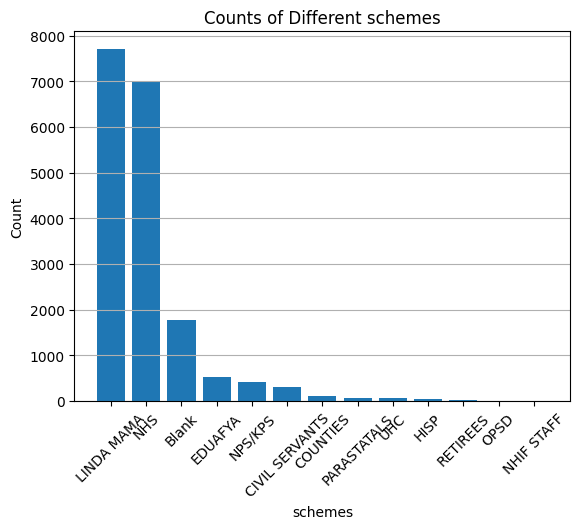

In [317]:

scheme_anomaly = anomalies_in_initial_dataset_df['scheme'].value_counts()
scheme_anomaly

import matplotlib.pyplot as plt

# Plotting the bar plot
plt.bar(scheme_anomaly.index, scheme_anomaly.values)
plt.xlabel('schemes')
plt.ylabel('Count')
plt.title('Counts of Different schemes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y')  # Add gridlines along y-axis
plt.show()

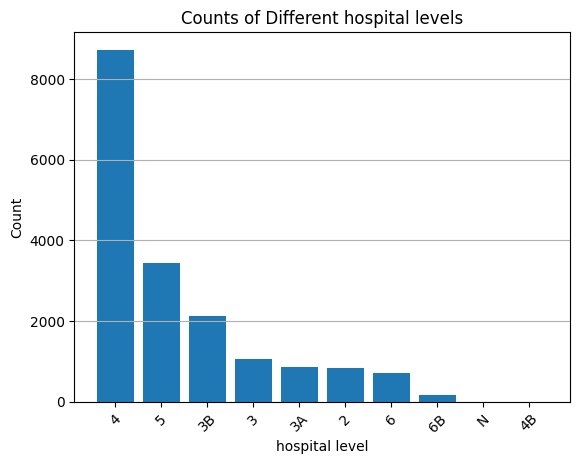

In [318]:
scheme_anomaly = anomalies_in_initial_dataset_df['hcp level'].value_counts()
scheme_anomaly

import matplotlib.pyplot as plt

# Plotting the bar plot
plt.bar(scheme_anomaly.index, scheme_anomaly.values)
plt.xlabel('hospital level')
plt.ylabel('Count')
plt.title('Counts of Different hospital levels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y')  # Add gridlines along y-axis
plt.show()

In [319]:
scheme_anomaly = anomalies_in_initial_dataset_df['branch'].value_counts().head(10)
scheme_anomaly

KISUMU BRANCH        1510
MIGORI BRANCH         977
MUMIAS BRANCH         891
UPPER HILL BRANCH     834
HOMA BAY BRANCH       761
KISII BRANCH          713
NAKURU BRANCH         696
KAKAMEGA BRANCH       565
KITALE BRANCH         564
SIAYA BRANCH          551
Name: branch, dtype: int64

In [320]:
scheme_anomaly = anomalies_in_initial_dataset_df['branch'].value_counts().tail(10)
scheme_anomaly

MARSABIT BRANCH         20
MARALAL BRANCH          17
LOITOKTOK SATELLITE     16
MWINGI SATELLITE         9
OLENGURUONE SATELLIT     9
VOI BRANCH               8
MAKINDU SATELLITE        4
KIBWEZI SATELLITE        4
ELDAMA RAVINE SATELL     3
WUNDANYI SATELLITE       1
Name: branch, dtype: int64

In [328]:
scheme_anomaly = anomalies_in_initial_dataset_df['disease'].value_counts()
scheme_anomaly

O80.0    4128
O80      1654
O82.1     470
B50       464
N18       400
         ... 
G90         1
I21.9       1
M02         1
M47.8       1
P84         1
Name: disease, Length: 1697, dtype: int64

In [327]:
scheme_anomaly = anomalies_in_initial_dataset_df['received_month'].value_counts()
scheme_anomaly

11    2410
6     2166
5     1834
2     1692
3     1517
8     1468
1     1303
10    1282
9     1262
12    1208
4     1149
7      796
Name: received_month, dtype: int64

In [329]:
scheme_anomaly = anomalies_in_initial_dataset_df['days'].value_counts()
scheme_anomaly

0.0       5995
1.0       3293
2.0       1976
3.0       1956
4.0       1441
          ... 
8659.0       1
299.0        1
152.0        1
110.0        1
174.0        1
Name: days, Length: 126, dtype: int64

In [335]:
scheme_anomaly = anomalies_in_initial_dataset_df['hcp cat_Government hospital'].value_counts()
scheme_anomaly

1    9072
0    9015
Name: hcp cat_Government hospital, dtype: int64

In [336]:
scheme_anomaly = anomalies_in_initial_dataset_df['hcp cat_Private hospital'].value_counts()
scheme_anomaly

0    11421
1     6666
Name: hcp cat_Private hospital, dtype: int64

In [337]:
scheme_anomaly = anomalies_in_initial_dataset_df['hcp cat_Mission hospital'].value_counts()
scheme_anomaly

0    15738
1     2349
Name: hcp cat_Mission hospital, dtype: int64

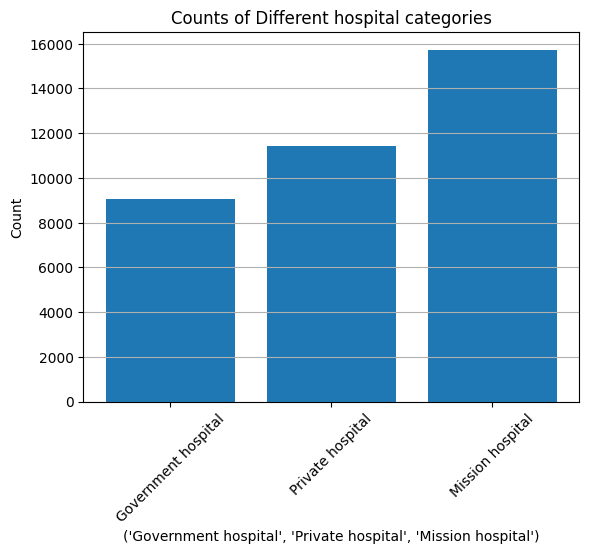

In [338]:
category = (9072, 11421,15738)
labels = ('Government hospital','Private hospital','Mission hospital')
# Plotting the bar plot
plt.bar(labels, category)
plt.xlabel(labels)
plt.ylabel('Count')
plt.title('Counts of Different hospital categories')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y')  # Add gridlines along y-axis
plt.show()

In [339]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

              precision    recall  f1-score   support

     anomaly       1.00      0.10      0.17     18087
      normal       0.91      1.00      0.95    162890

    accuracy                           0.91    180977
   macro avg       0.95      0.55      0.56    180977
weighted avg       0.92      0.91      0.87    180977



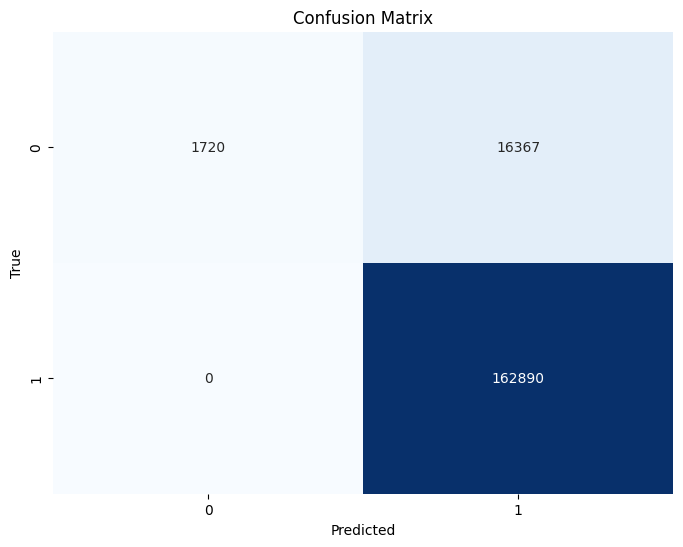

In [340]:
print(classification_report(y_pred, y_test,target_names=['anomaly','normal']))
cm = confusion_matrix(y_pred, y_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#Local outlier factor and Grid search CV


In [341]:
import time

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs, make_moons
from sklearn.ensemble import IsolationForest
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDOneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import make_pipeline

matplotlib.rcParams["contour.negative_linestyle"] = "solid"

In [342]:
xtrain1 = xtrain.drop(columns = ['anomaly_score','anomaly'])
xtrain1

,days,Claim Amt,Bill Amt,days till notice,admission_month,discharge_month,received_month,admission_day,admission_day,admission_day
0,0,16000,8000,-8216,8,8,9,8,8,8
1,1,1800,77330,-8263,6,6,4,12,12,12
2,4,50000,50000,-8231,10,10,9,21,21,21
3,3,3600,3600,-7365,10,10,9,4,4,4
4,0,17000,3439,-5949,8,8,12,25,25,25
...,...,...,...,...,...,...,...,...,...,...
904879,1,5000,5000,74,5,5,7,18,18,18
904880,1,5000,5000,74,5,5,7,18,18,18
904881,0,5000,5000,106,4,4,7,14,14,14
904882,1,5000,5000,74,5,5,7,18,18,18


In [343]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_scaled = scaler.fit_transform(xtrain1)
df_scaled = pd.DataFrame(df_scaled, columns=features)

In [344]:
xtrain1.isna().sum()

days                0
Claim Amt           0
Bill Amt            0
days till notice    0
admission_month     0
discharge_month     0
received_month      0
admission_day       0
admission_day       0
admission_day       0
dtype: int64

In [345]:
xtrain1.dtypes

days                int64
Claim Amt           int64
Bill Amt            int64
days till notice    int64
admission_month     int64
discharge_month     int64
received_month      int64
admission_day       int64
admission_day       int64
admission_day       int64
dtype: object

On the one hand, RobustScaler scales each feature independently by using the interquartile range (IQR) by default, which is the range between the 25th and 75th percentiles of the data. It centers the data by subtracting the median and then scale it by dividing by the IQR. The IQR is robust to outliers: the median and interquartile range are less affected by extreme values than the range, the mean and the standard deviation. Furthermore, RobustScaler does not squash marginal outlier values, contrary to StandardScaler.

On the other hand, MinMaxScaler scales each feature individually such that its range maps into the range between zero and one. If there are outliers in the data, they can skew it towards either the minimum or maximum values, leading to a completely different distribution of data with large marginal outliers: all non-outlier values can be collapsed almost together as a result.

In [ ]:

# Hyperparameter Tuning (Grid Search)
param_grid = {
    'n_neighbors': [5, 10, 15],  # Number of neighbors to consider
    'contamination': [0.01, 0.02, 0.05],  # Proportion of outliers in the data
    'algorithm': ['auto','ball_tree','kd_tree']
}

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


In [346]:
#fitting the model using the best hyper parameters
clf = LocalOutlierFactor(contamination = 0.01)
clf.fit_predict(xtrain1)
results = clf.negative_outlier_factor_
print(results)

[ -24.43590622  -16.45802599 -150.94996837 ...   -1.04568123   -1.
   -1.        ]


In [347]:
lof_model = LocalOutlierFactor(contamination=0.01,novelty = False)  # Adjust contamination parameter as needed
outlier_labels = lof_model.fit_predict(xtrain1)

# Add outlier labels to DataFrame
xtrain1['Outlier'] = outlier_labels

print("DataFrame with Outlier Labels:")
print(xtrain1)

DataFrame with Outlier Labels:
        days  Claim Amt  Bill Amt  days till notice  admission_month  \
0          0      16000      8000             -8216                8   
1          1       1800     77330             -8263                6   
2          4      50000     50000             -8231               10   
3          3       3600      3600             -7365               10   
4          0      17000      3439             -5949                8   
...      ...        ...       ...               ...              ...   
904879     1       5000      5000                74                5   
904880     1       5000      5000                74                5   
904881     0       5000      5000               106                4   
904882     1       5000      5000                74                5   
904883     1       5000      5000                74                5   

        discharge_month  received_month  admission_day  admission_day  \
0                     8        

In [349]:
xtrain1['Outlier'].value_counts()


 1    895836
-1      9048
Name: Outlier, dtype: int64

In [351]:
LOFanomalies = inpatient_claims[xtrain1['Outlier'] == -1]

print("Rows with Anomalies:")
print(LOFanomalies)

Rows with Anomalies:
                                      hcp name hcp level  days disease status  \
62           MAAI MAHIU MATERNITY AND HOSPITAL        3B   1.0     O80     AP   
128                      BUKAYA MEDICAL CENTRE        3B   0.0   O80.0     AP   
148       THE NAIROBI WOMEN'S HOSPITAL - ADAMS         4   0.0     R51     UI   
512                            SILOAM HOSPITAL         5   0.0     N18     XX   
545        PROVINCIAL GENERAL HOSPITAL  KISUMU         5   0.0     S61     RA   
...                                        ...       ...   ...     ...    ...   
904742       ST. PAULS EMUSONGA MEDICAL CENTRE        3A   2.0   A01.0     AP   
904772  ST. JOSEPH'S NURSING AND MATERNITY HOM         4   1.0   O80.0     AP   
904794         OLEGURUONE SUBDISTRICT HOSPITAL         4   1.0     O06     AP   
904842             MURIRANJA DISTRICT HOSPITAL         4   0.0   O80.0     AA   
904860           KIRWARA SUB-DISTRICT HOSPITAL         4   1.0   O82.1     AP   

      

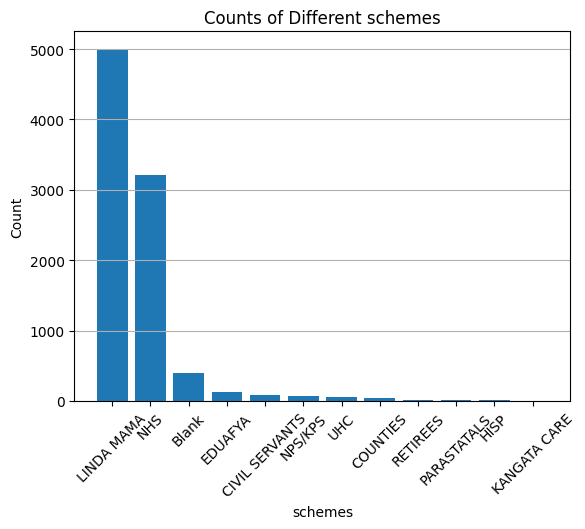

In [353]:
LOFanomaly = LOFanomalies['scheme'].value_counts()
LOFanomaly

import matplotlib.pyplot as plt

# Plotting the bar plot
plt.bar(LOFanomaly.index, LOFanomaly.values)
plt.xlabel('schemes')
plt.ylabel('Count')
plt.title('Counts of Different schemes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y')  # Add gridlines along y-axis
plt.show()

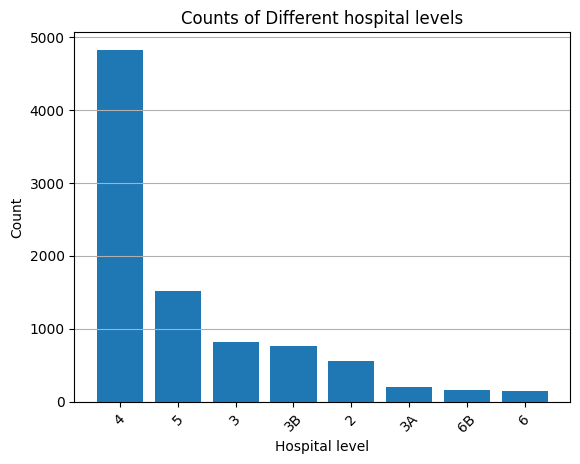

In [355]:
LOFanomaly = LOFanomalies['hcp level'].value_counts()
LOFanomaly

import matplotlib.pyplot as plt

# Plotting the bar plot
plt.bar(LOFanomaly.index, LOFanomaly.values)
plt.xlabel('Hospital level')
plt.ylabel('Count')
plt.title('Counts of Different hospital levels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y')  # Add gridlines along y-axis
plt.show()

In [356]:
LOFanomaly = LOFanomalies['branch'].value_counts().head(10)
LOFanomaly

KISUMU BRANCH        704
UPPER HILL BRANCH    608
NAKURU BRANCH        404
MUMIAS BRANCH        354
BURUBURU BRANCH      302
KISII BRANCH         290
KAKAMEGA BRANCH      286
KERICHO BRANCH       280
KITALE BRANCH        258
MIGORI BRANCH        250
Name: branch, dtype: int64

In [357]:
LOFanomaly = LOFanomalies['branch'].value_counts().tail(10)
LOFanomaly

GARISSA BRANCH          18
MOYALE BRANCH           14
MARALAL BRANCH          14
K N H BRANCH            10
KANGEMI BRANCH           8
GIKOMBA BRANCH           6
LOITOKTOK SATELLITE      2
MWINGI SATELLITE         2
KIBWEZI SATELLITE        2
OLENGURUONE SATELLIT     2
Name: branch, dtype: int64

In [358]:
LOFanomaly = LOFanomalies['hcp cat_Government hospital'].value_counts()
LOFanomaly

1    5742
0    3306
Name: hcp cat_Government hospital, dtype: int64

In [359]:
LOFanomaly = LOFanomalies['hcp cat_Mission hospital'].value_counts()
LOFanomaly

0    8442
1     606
Name: hcp cat_Mission hospital, dtype: int64

In [360]:
LOFanomaly = LOFanomalies['hcp cat_Private hospital'].value_counts()
LOFanomaly

0    6348
1    2700
Name: hcp cat_Private hospital, dtype: int64

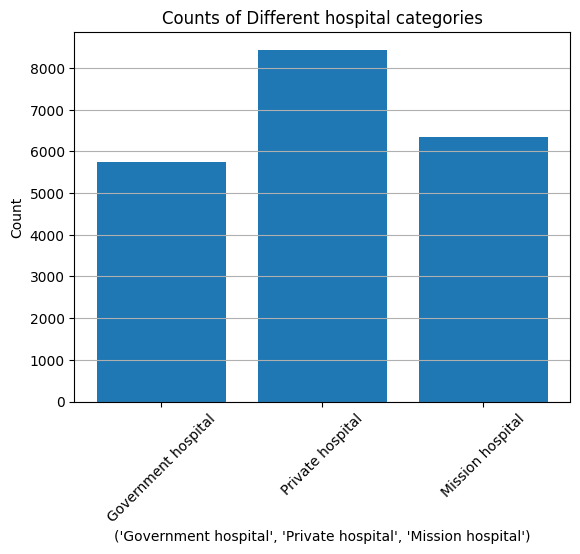

In [361]:
category = ( 5742,8442,6348)
labels = ('Government hospital','Private hospital','Mission hospital')
# Plotting the bar plot
plt.bar(labels, category)
plt.xlabel(labels)
plt.ylabel('Count')
plt.title('Counts of Different hospital categories')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y')  # Add gridlines along y-axis
plt.show()

In [362]:
LOFanomaly = LOFanomalies['disease'].value_counts()
LOFanomaly

O80.0    2572
O80       784
N18       604
O82.1     214
N18.9     184
         ... 
O02.0       2
O30         2
J15.9       2
R91         2
J20.9       2
Name: disease, Length: 478, dtype: int64

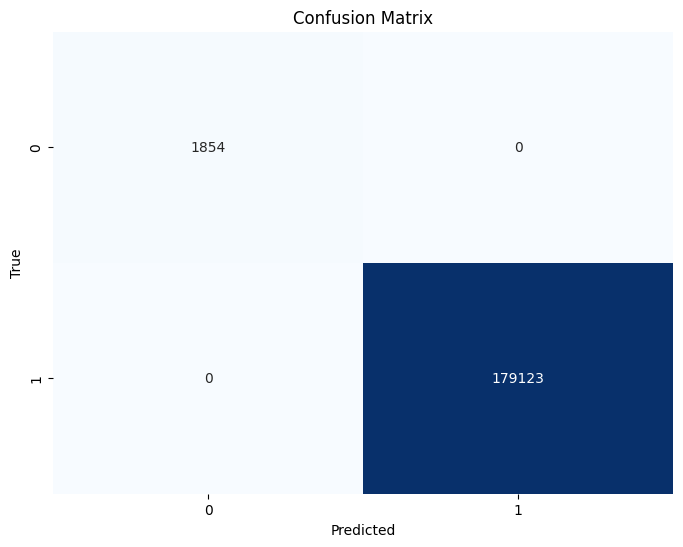

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Extract ground truth labels
true_labels = X_test['Outlier']

# Extract predicted outlier labels
predicted_labels = X_test['Outlier']

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#One class SVM

In [363]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [364]:
xtrain2 = xtrain.drop(columns = ['anomaly_score','anomaly'])
xtrain2

,days,Claim Amt,Bill Amt,days till notice,admission_month,discharge_month,received_month,admission_day,admission_day,admission_day
0,0,16000,8000,-8216,8,8,9,8,8,8
1,1,1800,77330,-8263,6,6,4,12,12,12
2,4,50000,50000,-8231,10,10,9,21,21,21
3,3,3600,3600,-7365,10,10,9,4,4,4
4,0,17000,3439,-5949,8,8,12,25,25,25
...,...,...,...,...,...,...,...,...,...,...
904879,1,5000,5000,74,5,5,7,18,18,18
904880,1,5000,5000,74,5,5,7,18,18,18
904881,0,5000,5000,106,4,4,7,14,14,14
904882,1,5000,5000,74,5,5,7,18,18,18


In [365]:
xtrain2.dtypes
xtrain2.isna().sum()

days                0
Claim Amt           0
Bill Amt            0
days till notice    0
admission_month     0
discharge_month     0
received_month      0
admission_day       0
admission_day       0
admission_day       0
dtype: int64

In [366]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(xtrain2)
df_scaled = pd.DataFrame(df_scaled, columns=features)

#Hospital Name

In [ ]:
print_arr(inpatient_claims['hcp name'].unique())

KENYATTA NATIONAL HOSPITAL (GENERAL WARD
FRIENDS KAIMOSI HOSPITAL
ST. MATIA MULUMBA HOSPITAL
THE PORT FLORENCE COMMUNITY HOSPITAL
ST. ROBERT SILVER MATERNITY & NURSING
MOMBASA HOSPITAL ASSOCIATION
COAST GENERAL HOSPITAL (MOMBASA)
NAZARETH HOSPITAL  RIARA RIDGE
THE KITUI MATERNITY & NURSING HOME
A.I.C KAPSOWAR HOSPITAL (ELDORET)
MARAGUA DISTRICT HOSPITAL
THE LIGHT NAIVASHA DOCTORS PLAZA
LADY GRIGGS MATERNITY HOSPITAL
S.S. LEAGUE M.P SHAH HOSPITAL  NAIROBI
MAMA LUCY KIBAKI HOSPITAL
ITEN COUNTY REFERAL HOSPITAL
NAIROBI WOMEN'S HOSPITAL KITENGELA MEDICAL CLINIC
H.H AGA KHAN DISP. & MAT. HOSPITAL KISUM
BENMAC HEALTH CLINIC
VINEYARD HOSPITAL
NAIROBI WEST HOSPITAL
ST.TERESA HOSPITAL KIAMBU
CONSOLATA HOSPITAL (NYERI)
NORTH KINANGOP CATHOLIC HOSPITAL
KAPENGURIA DISTRICT HOSPITAL
EMBU LEVEL 5 HOSPITAL
ST. MARY'S HOSPITAL (MUMIAS)
ATHI-RIVER SHALOM COMMUNITY HOSPITAL
A.I.C. LITEIN COTTAGE HOSPITAL KERICHO
ST. CLARES MISSION HOSPITAL (KAPLONG)
RIFT VALLEY PROV. GENERAL HOSP. NAKURU
HOLY FAMILY HOS

#Voucher Date

In [ ]:
print_arr(inpatient_claims['voucher date'].unique())

In [ ]:
def is_valid_date(date_string):
    try:
        pd.to_datetime(date_string)
        return True
    except ValueError:
        return False

inpatient_claims['voucher date'] = inpatient_claims['voucher date'].astype(str)
invalid_dates = inpatient_claims['voucher date'][~inpatient_claims['voucher date'].apply(is_valid_date)]
print(invalid_dates)

In [ ]:
inpatient_claims[inpatient_claims['voucher date'].isnull()]

In [ ]:
inpatient_claims.loc[452442:, 'county'] = inpatient_claims.loc[452442:, 'branch'].values
inpatient_claims

In [ ]:
inpatient_claims.loc[452442:, 'voucher date'] = np.nan
inpatient_claims

Checking percentage of NaNs in the voucher date column

In [ ]:
inpatient_claims[inpatient_claims['voucher date'] == 'NaN'].shape[0] / inpatient_claims.shape[0] * 100

Justify dropping voucher dates

In [ ]:
inpatient_claims = inpatient_claims.drop(columns=['voucher date'])
inpatient_claims

Branch

In [ ]:
print_arr(inpatient_claims['branch'].unique())

#County

In [ ]:
print_arr(inpatient_claims['county'].unique())